In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load csv files into DataFrames
sf_78620_df = pd.read_csv("/content/78620_SF.csv")
sf_78642_df = pd.read_csv("/content/78642_SF.csv")
sf_78660_df = pd.read_csv("/content/78660_SF.csv")
sf_78664_df = pd.read_csv("/content/78664_SF.csv")
sf_78666_df = pd.read_csv("/content/78666_SF.csv")
c_78701_df = pd.read_csv("/content/78701_CONDO.csv")
sf_78744_df = pd.read_csv("/content/78744_SF.csv")
c_78746_df = pd.read_csv("/content/78746_CONDO.csv")
sf_78746_df = pd.read_csv("/content/78746_SF.csv")
c_78758_df = pd.read_csv("/content/78758_CONDO.csv")

# Review sample DataFrame
sf_78620_df.head()

,#,Listing ID,St,MLS Area,Address,# Beds,# Full Baths,# Half Baths,# Garage Spaces,Levels,Year Built,Acres,SqFt,List Price,LP$/SqFt,Close$/SqFt,Close Price,Close Date,DOM,CDOM
0,1,2819373,C,BL,235 Mystic Overlook,2,2,0,0.0,1,2018,2.50,"1,984","$650,000",$327.62,$300.00,"$595,200",02/09/2024,118,108
1,1,4751347,C,BL,901 Beauchamp Rd,3,2,0,2.0,1,2013,1.50,"1,827","$689,000",$377.12,$369.46,"$675,000",11/08/2023,64,64
2,1,3471099,C,BL,1239 Whitetail Dr,3,2,0,0.0,2,1985,1.23,"1,457","$875,000",$600.55,$519.56,"$757,000",01/24/2024,33,31
3,1,9152329,C,BL,447 Miss Donna Ln,4,2,1,0.0,1,2005,4.64,"2,535","$800,000",$315.58,$309.66,"$785,000",02/23/2024,15,15
4,1,5992438,C,BL,TBA Mystic Overlook Rd,3,2,0,2.0,1,1985,20.00,"2,847","$1,389,000",$487.88,$421.95,"$1,201,305",04/09/2024,51,141


In [ ]:
# Create list of DataFrames
all_dfs = [sf_78620_df, sf_78642_df, sf_78660_df, sf_78664_df, sf_78666_df, c_78701_df, sf_78744_df, c_78746_df, sf_78746_df, c_78758_df]

# Define a list of names corresponding to the dataframes
df_names = ["sf_78620_df", "sf_78642_df", "sf_78660_df", "sf_78664_df", "sf_78666_df", "c_78701_df", "sf_78744_df", "c_78746_df", "sf_78746_df", "c_78758_df"]

In [ ]:
# Build function for basic cleaning of all DataFrames in list
def clean_dataframe(df, name):

    # Remove unnecessary columns
    df.drop(columns=["#", "Listing ID", "St", "MLS Area", "Address", "Close Date", "DOM", "List Price", "LP$/SqFt", "Close$/SqFt"], inplace=True)

    # Extract the zip code from the dataframe name
    zip_code_parts = name.split("_")
    if len(zip_code_parts) == 3:  # Check if the name has the expected format
        zip_code = zip_code_parts[1]  # Extract the zip code from the name
        df["Zip Code"] = zip_code
    else:
        zip_code = ""
        df["Zip Code"] = zip_code

    # Extract the home type from the dataframe name
    home_type = "Single Family" if name.startswith("sf") else "Condo"

    # Add a "Home Type" column with the extracted home type value to the dataframe
    df["Home Type"] = home_type

    # Remove non-numeric characters from columns with dollar signs
    columns_with_dollar_signs = ["Close Price"]
    for column in columns_with_dollar_signs:
        df[column] = df[column].replace("[\$,]", "", regex=True).astype(float)

    # Combine full and half bath columns to create a new column for total bathrooms
    df["Total Baths"] = df["# Full Baths"] + 0.5 * df["# Half Baths"]

    # Drop original full and half bath columns
    df.drop(columns=["# Full Baths", "# Half Baths"], inplace=True)

    # Remove commas from values in the "SqFt" column
    df["SqFt"] = df["SqFt"].str.replace(",", "")

    # Convert "SqFt" and "Levels" columns to numeric
    df[["SqFt", "Levels"]] = df[["SqFt", "Levels"]].apply(pd.to_numeric, errors="coerce")

    return df

# Loop through each dataframe in the list and apply cleaning function
for i, df in enumerate(all_dfs):
    name = df_names[i]  # Get the name corresponding to the current dataframe
    all_dfs[i] = clean_dataframe(df, name)

# Review sample DataFrame after cleaning
sf_78620_df.head()

,# Beds,# Garage Spaces,Levels,Year Built,Acres,SqFt,Close Price,CDOM,Zip Code,Home Type,Total Baths
0,2,0.0,1.0,2018,2.50,1984,595200.0,108,78620,Single Family,2.0
1,3,2.0,1.0,2013,1.50,1827,675000.0,64,78620,Single Family,2.0
2,3,0.0,2.0,1985,1.23,1457,757000.0,31,78620,Single Family,2.0
3,4,0.0,1.0,2005,4.64,2535,785000.0,15,78620,Single Family,2.5
4,3,2.0,1.0,1985,20.00,2847,1201305.0,141,78620,Single Family,2.0


In [ ]:
# Combine all cleaned dataframes into one dataframe
combined_df = pd.concat(all_dfs)

# Reset index to ensure continuous index values
combined_df.reset_index(drop=True, inplace=True)

# Review the combined dataframe
print(combined_df.head())

   # Beds  # Garage Spaces  Levels  Year Built  Acres  SqFt  Close Price  \
0       2              0.0     1.0        2018   2.50  1984     595200.0   
1       3              2.0     1.0        2013   1.50  1827     675000.0   
2       3              0.0     2.0        1985   1.23  1457     757000.0   
3       4              0.0     1.0        2005   4.64  2535     785000.0   
4       3              2.0     1.0        1985  20.00  2847    1201305.0   

   CDOM Zip Code      Home Type  Total Baths  
0   108    78620  Single Family          2.0  
1    64    78620  Single Family          2.0  
2    31    78620  Single Family          2.0  
3    15    78620  Single Family          2.5  
4   141    78620  Single Family          2.0  


In [ ]:
# Confirm data types are appropriate for the model
combined_df.dtypes

# Beds               int64
# Garage Spaces    float64
Levels             float64
Year Built           int64
Acres              float64
SqFt                 int64
Close Price        float64
CDOM                 int64
Zip Code            object
Home Type           object
Total Baths        float64
dtype: object

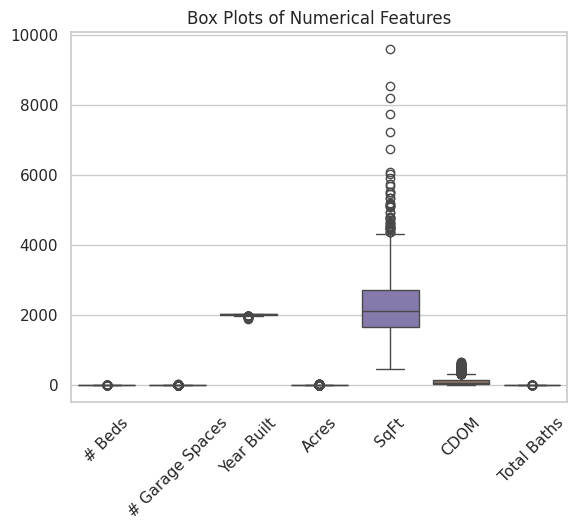

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify potential outliers
# Set the style of seaborn
sns.set(style="whitegrid")

# Define the numerical features to visualize
numerical_features = ["# Beds", "# Garage Spaces", "Year Built", "Acres", "SqFt", "CDOM", "Total Baths"]

# Create box plots for numerical features
sns.boxplot(data=combined_df[numerical_features])
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
'''import numpy as np

# Trial 5 attempt did not improve model, ignore this section
# Calculate Z-score for the "SqFt" variable
z_scores = (combined_df['SqFt'] - combined_df['SqFt'].mean()) / combined_df['SqFt'].std()

# Set a threshold for extreme outliers (e.g., Z-score > 3)
threshold = 3

# Identify rows with Z-scores greater than the threshold
outlier_rows = combined_df[z_scores > threshold]

# Remove the rows associated with extreme outliers
combined_df_clean = combined_df.drop(outlier_rows.index)

# Print information about the removed outliers
print("Number of outliers removed:", len(outlier_rows))
print("Rows removed:", outlier_rows)'''


In [ ]:
'''# The SqFt variable appears to have outliers, remove those to see if model improves for trial 5
# Calculate Z-score for the "SqFt" variable
z_scores = (combined_df['SqFt'] - combined_df['SqFt'].mean()) / combined_df['SqFt'].std()

# Set a threshold for extreme outliers (e.g., Z-score > 3)
threshold = 3

# Identify rows with Z-scores greater than the threshold
outlier_rows = combined_df[z_scores > threshold]

# Remove the rows associated with extreme outliers
combined_df_clean = combined_df.drop(outlier_rows.index)

# Print information about the removed outliers
print("Number of outliers removed:", len(outlier_rows))
print("Rows removed:", outlier_rows)'''

Number of outliers removed: 23
Rows removed:       # Beds  # Garage Spaces  Levels  Year Built    Acres  SqFt  Close Price  \
187        5              3.0     2.0        2024   0.2750  5128    1070000.0   
204        5              3.0     2.0        2023   0.4060  5124    1400000.0   
206        6              3.0     NaN        1981  12.8006  7746    1500000.0   
213        6              3.0     2.0        2009   2.0800  5150    1850000.0   
216        4              3.0     2.0        2016  11.6710  6086    2321525.0   
217        7              3.0     2.0        2007  20.0000  6747    2387500.0   
218        5              5.0     1.0        1999  20.9200  5524    3480000.0   
674        5              3.0     2.0        2022   1.0270  5186    1150000.0   
681        5              4.0     2.0        2023   0.9873  5090    1225000.0   
1369       5              3.0     2.0        2000   0.3731  5732    1225000.0   
1774       7              3.0     2.0        1982   3.6410  8215

In [ ]:
# Filter out rows where "Home Type" is "Condo"
combined_no_condo = combined_df[combined_df["Home Type"] != "Condo"]

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from category_encoders import TargetEncoder

# Define features, create test/train data
# Combine "Zip Code" and "Home Type" (categorical features) into a single dataframe
encoder_df = combined_no_condo[[# "Levels",
                                "Zip Code",
                                "Home Type"]]

# Perform target encoding for categorical features
encoder = TargetEncoder()
encoded_features = encoder.fit_transform(encoder_df, combined_no_condo["Close Price"])

# Prepare continuous features
continuous_features = ["# Beds",
                       "# Garage Spaces",
                       "Year Built",
                       "Acres",
                       "SqFt",
                       "CDOM",
                       "Total Baths"]
boost_train_continuous = combined_no_condo[continuous_features]

# Combine target encoded categorical features and continuous features
x_train_boost_encoded = pd.concat([boost_train_continuous, encoded_features], axis=1)

# Split data into training and testing sets
y = combined_no_condo["Close Price"]
x_train, x_test, y_train, y_test = train_test_split(x_train_boost_encoded, y, test_size=0.2, random_state=42)'''

In [ ]:
'''from sklearn.model_selection import GridSearchCV

# Parameter tuning
# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3],
    'gamma': [0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0.1, 0.5, 1],
    'reg_lambda': [0.1, 0.5, 1],
    'n_estimators': [100, 200, 300]
}

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=3)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best parameters found by grid search:")
print(grid_search.best_params_)

# Get the best estimator
best_xgb_model = grid_search.best_estimator_'''

In [ ]:
'''# Build the XGBRegressor model
# Trial 1 using params found in test_data
xgb_model_1 = xgb.XGBRegressor(colsample_bytree=0.9,
                             gamma=0.1,
                             learning_rate=0.1,
                             max_depth=3,
                             min_child_weight=3,
                             n_estimators=300,
                             reg_alpha=0.1,
                             reg_lambda=0.1,
                             subsample=0.7)

# Fit the model to the training data
xgb_model_1.fit(x_train, y_train)

# Make predictions
predictions_1 = xgb_model_1.predict(x_test)'''

In [ ]:
'''from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, mean_squared_log_error, explained_variance_score
import numpy as np

# Evaluate the model, model trial 1
# Calculate R-squared
r_squared = r2_score(y_test, predictions_1)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions_1)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions_1, squared=False)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, predictions_1)

# Calculate Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, predictions_1)

# Calculate Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_test, predictions_1)

# Calculate Explained Variance Score
explained_var_score = explained_variance_score(y_test, predictions_1)

# Print the evaluation metrics
print("R-squared:", r_squared)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Median Absolute Error (MedAE):", medae)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("Explained Variance Score:", explained_var_score)'''

R-squared: 0.7114856923757661
Mean Absolute Error (MAE): 106824.91361350575
Root Mean Squared Error (RMSE): 301033.64189912804
Mean Absolute Percentage Error (MAPE): 14.10671194086083
Median Absolute Error (MedAE): 41617.46875
Mean Squared Logarithmic Error (MSLE): 0.03850193101829329
Explained Variance Score: 0.7116164270127023


In [ ]:
'''# Build the XGBRegressor model
# Trial 2 using params from GridSearchCV
xgb_model_2 = xgb.XGBRegressor(colsample_bytree=0.8,
                               gamma=0.1,
                               learning_rate=0.1,
                               max_depth=3,
                               min_child_weight=1,
                               n_estimators=300,
                               reg_alpha=0.1,
                               reg_lambda=0.5,
                               subsample=0.8)

# Fit the model to the training data
xgb_model_2.fit(x_train, y_train)

# Make predictions
predictions_2 = xgb_model_2.predict(x_test)
'''

In [ ]:
'''from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, mean_squared_log_error, explained_variance_score
import numpy as np

# Evaluate the model, model trial 2
# Calculate R-squared
r_squared = r2_score(y_test, predictions_2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions_2)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions_2, squared=False)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, predictions_2)

# Calculate Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, predictions_2)

# Calculate Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_test, predictions_2)

# Calculate Explained Variance Score
explained_var_score = explained_variance_score(y_test, predictions_2)

# Print the evaluation metrics
print("R-squared:", r_squared)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Median Absolute Error (MedAE):", medae)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("Explained Variance Score:", explained_var_score)'''

R-squared: 0.8217439354780948
Mean Absolute Error (MAE): 88497.1270474138
Root Mean Squared Error (RMSE): 236621.12359014983
Mean Absolute Percentage Error (MAPE): 11.864626403390838
Median Absolute Error (MedAE): 35807.0
Mean Squared Logarithmic Error (MSLE): 0.02838700653593694
Explained Variance Score: 0.8217764608562057


In [ ]:
'''# Build the XGBRegressor model
# Trial 3 using params from GridSearchCV, no condos, "levels" changed to categorical
xgb_model_3 = xgb.XGBRegressor(colsample_bytree=0.8,
                               gamma=0.1,
                               learning_rate=0.1,
                               max_depth=3,
                               min_child_weight=1,
                               n_estimators=300,
                               reg_alpha=0.1,
                               reg_lambda=0.5,
                               subsample=0.8)

# Fit the model to the training data
xgb_model_3.fit(x_train, y_train)

# Make predictions
predictions_3 = xgb_model_3.predict(x_test)'''

In [ ]:
'''from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, mean_squared_log_error, explained_variance_score
import numpy as np

# Evaluate the model, model trial 3
# Calculate R-squared
r_squared = r2_score(y_test, predictions_3)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions_3)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions_3, squared=False)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, predictions_3)

# Calculate Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, predictions_3)

# Calculate Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_test, predictions_3)

# Calculate Explained Variance Score
explained_var_score = explained_variance_score(y_test, predictions_3)

# Print the evaluation metrics
print("R-squared:", r_squared)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Median Absolute Error (MedAE):", medae)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("Explained Variance Score:", explained_var_score)'''

R-squared: 0.8272991712494224
Mean Absolute Error (MAE): 80400.32744728915
Root Mean Squared Error (RMSE): 204077.83478966786
Mean Absolute Percentage Error (MAPE): 11.37688514776616
Median Absolute Error (MedAE): 33783.09375
Mean Squared Logarithmic Error (MSLE): 0.02431821285573467
Explained Variance Score: 0.8295969843152656


In [ ]:
'''# Build the XGBRegressor model
# Trial 4 using params from GridSearchCV, no condos/levels
xgb_model_4 = xgb.XGBRegressor(colsample_bytree=0.8,
                              gamma=0.1,
                               learning_rate=0.1,
                               max_depth=3,
                               min_child_weight=1,
                               n_estimators=300,
                               reg_alpha=0.1,
                               reg_lambda=0.5,
                               subsample=0.8)

# Fit the model to the training data
xgb_model_4.fit(x_train, y_train)

# Make predictions
predictions_4 = xgb_model_4.predict(x_test)
'''

In [ ]:
'''from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, mean_squared_log_error, explained_variance_score

# Evaluate the model, model trial 4
# Calculate R-squared
r_squared = r2_score(y_test, predictions_4)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions_4)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions_4, squared=False)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, predictions_4)

# Calculate Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, predictions_4)

# Calculate Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_test, predictions_4)

# Calculate Explained Variance Score
explained_var_score = explained_variance_score(y_test, predictions_4)

# Print the evaluation metrics
print("R-squared:", r_squared)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Median Absolute Error (MedAE):", medae)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("Explained Variance Score:", explained_var_score)'''

R-squared: 0.8498619476371122
Mean Absolute Error (MAE): 80661.19288403615
Root Mean Squared Error (RMSE): 190280.3825761661
Mean Absolute Percentage Error (MAPE): 11.195099473886112
Median Absolute Error (MedAE): 31951.375
Mean Squared Logarithmic Error (MSLE): 0.023897572153144076
Explained Variance Score: 0.851764488225174


In [ ]:
'''# Build the XGBRegressor model
# Trial 5 using params from GridSearchCV, no condos/levels, SqFt outliers removed
xgb_model_5 = xgb.XGBRegressor(colsample_bytree=0.8,
                              gamma=0.1,
                               learning_rate=0.1,
                               max_depth=3,
                               min_child_weight=1,
                               n_estimators=300,
                               reg_alpha=0.1,
                               reg_lambda=0.5,
                               subsample=0.8)

# Fit the model to the training data
xgb_model_5.fit(x_train, y_train)

# Make predictions
predictions_5 = xgb_model_5.predict(x_test)'''

In [ ]:
'''from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, mean_squared_log_error, explained_variance_score

# Evaluate the model, model trial 4
# Calculate R-squared
r_squared = r2_score(y_test, predictions_5)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions_5)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions_5, squared=False)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, predictions_5)

# Calculate Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, predictions_5)

# Calculate Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_test, predictions_5)

# Calculate Explained Variance Score
explained_var_score = explained_variance_score(y_test, predictions_5)

# Print the evaluation metrics
print("R-squared:", r_squared)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Median Absolute Error (MedAE):", medae)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("Explained Variance Score:", explained_var_score)'''

R-squared: 0.8263671596546145
Mean Absolute Error (MAE): 68504.05542883211
Root Mean Squared Error (RMSE): 175676.5737176716
Mean Absolute Percentage Error (MAPE): 10.243794771910464
Median Absolute Error (MedAE): 31922.9375
Mean Squared Logarithmic Error (MSLE): 0.021693774570015173
Explained Variance Score: 0.8267582149192252


In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, mean_squared_log_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from category_encoders import TargetEncoder

# Combine multiple models through the ensemble method, model trial 6
# Define features and create test/train data
encoder_df = combined_no_condo[["Zip Code", "Home Type"]]

# Perform target encoding for categorical features
encoder = TargetEncoder()
encoded_features = encoder.fit_transform(encoder_df, combined_no_condo["Close Price"])

# Prepare continuous features
continuous_features = ["# Beds", "# Garage Spaces", "Year Built", "Acres", "SqFt", "CDOM", "Total Baths"]
boost_train_continuous = combined_no_condo[continuous_features]

# Combine target encoded categorical features and continuous features
x_train_boost_encoded = pd.concat([boost_train_continuous, encoded_features], axis=1)

# Split data into training and testing sets
y = combined_no_condo["Close Price"]
x_train, x_test, y_train, y_test = train_test_split(x_train_boost_encoded, y, test_size=0.2, random_state=42)

# Train multiple models
rf_model = RandomForestRegressor()
linear_model = LinearRegression()
xgb_model = xgb.XGBRegressor(colsample_bytree=0.8, # Same params from GridSearchCV using target encoding
                              gamma=0.1,
                               learning_rate=0.1,
                               max_depth=3,
                               min_child_weight=1,
                               n_estimators=300,
                               reg_alpha=0.1,
                               reg_lambda=0.5,
                               subsample=0.8)

# Fit the models to the training data
rf_model.fit(x_train, y_train)
linear_model.fit(x_train, y_train)
xgb_model.fit(x_train, y_train)

# Make predictions using each model
rf_predictions = rf_model.predict(x_test)
linear_predictions = linear_model.predict(x_test)
xgb_predictions = xgb_model.predict(x_test)

# Combine predictions using averaging
ensemble_predictions = (rf_predictions + linear_predictions + xgb_predictions) / 3

# Calculate R-squared for each model
rf_r_squared = r2_score(y_test, rf_predictions)
linear_r_squared = r2_score(y_test, linear_predictions)
xgb_r_squared = r2_score(y_test, xgb_predictions)
ensemble_r_squared = r2_score(y_test, ensemble_predictions)

# Calculate Mean Absolute Percentage Error (MAPE) for each model
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)
linear_mape = mean_absolute_percentage_error(y_test, linear_predictions)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_predictions)
ensemble_mape = mean_absolute_percentage_error(y_test, ensemble_predictions)

# Calculate Median Absolute Error (MedAE) for each model
rf_medae = median_absolute_error(y_test, rf_predictions)
linear_medae = median_absolute_error(y_test, linear_predictions)
xgb_medae = median_absolute_error(y_test, xgb_predictions)
ensemble_medae = median_absolute_error(y_test, ensemble_predictions)

# Calculate Mean Squared Logarithmic Error (MSLE) for each model
rf_msle = mean_squared_log_error(y_test, rf_predictions)
linear_msle = mean_squared_log_error(y_test, np.abs(linear_predictions))  # Take absolute value
xgb_msle = mean_squared_log_error(y_test, xgb_predictions)
ensemble_msle = mean_squared_log_error(y_test, ensemble_predictions)

# Calculate Explained Variance Score for each model
rf_explained_var_score = explained_variance_score(y_test, rf_predictions)
linear_explained_var_score = explained_variance_score(y_test, linear_predictions)
xgb_explained_var_score = explained_variance_score(y_test, xgb_predictions)
ensemble_explained_var_score = explained_variance_score(y_test, ensemble_predictions)

# Print evaluation metrics for each model
print("Random Forest:")
print("R-squared:", rf_r_squared)
print("Mean Absolute Percentage Error (MAPE):", rf_mape)
print("Median Absolute Error (MedAE):", rf_medae)
print("Mean Squared Logarithmic Error (MSLE):", rf_msle)
print("Explained Variance Score:", rf_explained_var_score)
print()

print("Linear Regression:")
print("R-squared:", linear_r_squared)
print("Mean Absolute Percentage Error (MAPE):", linear_mape)
print("Median Absolute Error (MedAE):", linear_medae)
print("Mean Squared Logarithmic Error (MSLE):", linear_msle)
print("Explained Variance Score:", linear_explained_var_score)
print()

print("XGBoost:")
print("R-squared:", xgb_r_squared)
print("Mean Absolute Percentage Error (MAPE):", xgb_mape)
print("Median Absolute Error (MedAE):", xgb_medae)
print("Mean Squared Logarithmic Error (MSLE):", xgb_msle)
print("Explained Variance Score:", xgb_explained_var_score)
print()

print("Ensemble:")
print("R-squared:", ensemble_r_squared)
print("Mean Absolute Percentage Error (MAPE):", ensemble_mape)
print("Median Absolute Error (MedAE):", ensemble_medae)
print("Mean Squared Logarithmic Error (MSLE):", ensemble_msle)
print("Explained Variance Score:", ensemble_explained_var_score)'''

Random Forest:
R-squared: 0.8028712179496192
Mean Absolute Percentage Error (MAPE): 11.316486301049482
Median Absolute Error (MedAE): 31479.97999999998
Mean Squared Logarithmic Error (MSLE): 0.02493473873052804
Explained Variance Score: 0.8060104253152256

Linear Regression:
R-squared: 0.8226810981240993
Mean Absolute Percentage Error (MAPE): 25.23881751094801
Median Absolute Error (MedAE): 96293.21663914504
Mean Squared Logarithmic Error (MSLE): 0.16819253000418688
Explained Variance Score: 0.8229054816931548

XGBoost:
R-squared: 0.8498619476371122
Mean Absolute Percentage Error (MAPE): 11.195099473886112
Median Absolute Error (MedAE): 31951.375
Mean Squared Logarithmic Error (MSLE): 0.023897572153144076
Explained Variance Score: 0.851764488225174

Ensemble:
R-squared: 0.8956094237521685
Mean Absolute Percentage Error (MAPE): 13.535239169611192
Median Absolute Error (MedAE): 47846.09107259923
Mean Squared Logarithmic Error (MSLE): 0.02988491628652527
Explained Variance Score: 0.897069

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, mean_squared_log_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from category_encoders import TargetEncoder

# Combine multiple models through the ensemble method, model trial 6
# Define features and create test/train data
encoder_df = combined_no_condo[["Zip Code", "Home Type"]]

# Perform target encoding for categorical features
encoder = TargetEncoder()
encoded_features = encoder.fit_transform(encoder_df, combined_no_condo["Close Price"])

# Prepare continuous features
continuous_features = ["# Beds", "# Garage Spaces", "Year Built", "Acres", "SqFt", "CDOM", "Total Baths"]
boost_train_continuous = combined_no_condo[continuous_features]

# Combine target encoded categorical features and continuous features
x_train_boost_encoded = pd.concat([boost_train_continuous, encoded_features], axis=1)

# Split data into training and testing sets
y = combined_no_condo["Close Price"]
x_train, x_test, y_train, y_test = train_test_split(x_train_boost_encoded, y, test_size=0.2, random_state=42)

# Train multiple models
rf_model = RandomForestRegressor()
linear_model = LinearRegression()
xgb_model_2 = xgb.XGBRegressor(n_estimators=300, # Trial 2 using GridSearchCV params/one-hot encoding
                             max_depth=4,
                             learning_rate=0.1,
                             min_child_weight=1,
                             gamma=0.1,
                             colsample_bytree=0.9,
                             reg_alpha=0.5,
                             reg_lambda=1,
                             subsample=0.7,
                             eval_metric='mae')
# Fit the models to the training data
rf_model.fit(x_train, y_train)
linear_model.fit(x_train, y_train)
xgb_model_2.fit(x_train, y_train)

# Make predictions using each model
rf_predictions = rf_model.predict(x_test)
linear_predictions = linear_model.predict(x_test)
xgb_predictions_2 = xgb_model_2.predict(x_test)

# Combine predictions using averaging
ensemble_predictions = (rf_predictions + linear_predictions + xgb_predictions_2) / 3

# Calculate R-squared for each model
rf_r_squared = r2_score(y_test, rf_predictions)
linear_r_squared = r2_score(y_test, linear_predictions)
xgb_r_squared = r2_score(y_test, xgb_predictions_2)
ensemble_r_squared = r2_score(y_test, ensemble_predictions)

# Calculate Mean Absolute Percentage Error (MAPE) for each model
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)
linear_mape = mean_absolute_percentage_error(y_test, linear_predictions)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_predictions_2)
ensemble_mape = mean_absolute_percentage_error(y_test, ensemble_predictions)

# Calculate Median Absolute Error (MedAE) for each model
rf_medae = median_absolute_error(y_test, rf_predictions)
linear_medae = median_absolute_error(y_test, linear_predictions)
xgb_medae = median_absolute_error(y_test, xgb_predictions_2)
ensemble_medae = median_absolute_error(y_test, ensemble_predictions)

# Calculate Mean Squared Logarithmic Error (MSLE) for each model
rf_msle = mean_squared_log_error(y_test, rf_predictions)
linear_msle = mean_squared_log_error(y_test, np.abs(linear_predictions))  # Take absolute value
xgb_msle = mean_squared_log_error(y_test, xgb_predictions_2)
ensemble_msle = mean_squared_log_error(y_test, ensemble_predictions)

# Calculate Explained Variance Score for each model
rf_explained_var_score = explained_variance_score(y_test, rf_predictions)
linear_explained_var_score = explained_variance_score(y_test, linear_predictions)
xgb_explained_var_score = explained_variance_score(y_test, xgb_predictions_2)
ensemble_explained_var_score = explained_variance_score(y_test, ensemble_predictions)

# Print evaluation metrics for each model
print("Random Forest:")
print("R-squared:", rf_r_squared)
print("Mean Absolute Percentage Error (MAPE):", rf_mape)
print("Median Absolute Error (MedAE):", rf_medae)
print("Mean Squared Logarithmic Error (MSLE):", rf_msle)
print("Explained Variance Score:", rf_explained_var_score)
print()

print("Linear Regression:")
print("R-squared:", linear_r_squared)
print("Mean Absolute Percentage Error (MAPE):", linear_mape)
print("Median Absolute Error (MedAE):", linear_medae)
print("Mean Squared Logarithmic Error (MSLE):", linear_msle)
print("Explained Variance Score:", linear_explained_var_score)
print()

print("XGBoost:")
print("R-squared:", xgb_r_squared)
print("Mean Absolute Percentage Error (MAPE):", xgb_mape)
print("Median Absolute Error (MedAE):", xgb_medae)
print("Mean Squared Logarithmic Error (MSLE):", xgb_msle)
print("Explained Variance Score:", xgb_explained_var_score)
print()

print("Ensemble:")
print("R-squared:", ensemble_r_squared)
print("Mean Absolute Percentage Error (MAPE):", ensemble_mape)
print("Median Absolute Error (MedAE):", ensemble_medae)
print("Mean Squared Logarithmic Error (MSLE):", ensemble_msle)
print("Explained Variance Score:", ensemble_explained_var_score)

Random Forest:
R-squared: 0.7706912094454101
Mean Absolute Percentage Error (MAPE): 11.23925643778467
Median Absolute Error (MedAE): 30901.619999999995
Mean Squared Logarithmic Error (MSLE): 0.02461753841937092
Explained Variance Score: 0.7744145808661169

Linear Regression:
R-squared: 0.8226810981240993
Mean Absolute Percentage Error (MAPE): 25.23881751094801
Median Absolute Error (MedAE): 96293.21663914504
Mean Squared Logarithmic Error (MSLE): 0.16819253000418688
Explained Variance Score: 0.8229054816931548

XGBoost:
R-squared: 0.8599986193863655
Mean Absolute Percentage Error (MAPE): 10.775048650385681
Median Absolute Error (MedAE): 29499.3125
Mean Squared Logarithmic Error (MSLE): 0.022457511707837077
Explained Variance Score: 0.8612772841317198

Ensemble:
R-squared: 0.8960877215469063
Mean Absolute Percentage Error (MAPE): 13.386398783232128
Median Absolute Error (MedAE): 46177.37026012922
Mean Squared Logarithmic Error (MSLE): 0.029094206705274035
Explained Variance Score: 0.897